# COVID Chest X-ray images Detection using CNN 

## Project Steps:
> * #### Importing necessary Libraries
> * #### Data analysis
> * #### Images Preprocessing
> * #### Model Building
> * #### Evaluation and Using Pretrained Models
> * #### Summary

---

### Importing necessary Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

import random
import os

IMG_SIZE = 224
BATCH = 32
SEED = 42
random.seed(42)

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten
from keras.layers.core import Dense
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

---
### Data Analysis

In [3]:
df_train = pd.read_csv('/kaggle/input/shai-level-2-training-2023/train.csv')

In [4]:
df_train

,Image,Label
0,597631776.jpeg,normal
1,35266064.jpeg,virus
2,467414642.jpeg,normal
3,35667640.jpeg,normal
4,618841263.jpeg,normal
...,...,...
1191,118777221.jpeg,virus
1192,375945707.jpeg,normal
1193,531745860.jpeg,virus
1194,121544623.jpeg,covid


In [5]:
df_train.describe()

,Image,Label
count,1196,1196
unique,1196,3
top,597631776.jpeg,normal
freq,1,468


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   1196 non-null   object
 1   Label   1196 non-null   object
dtypes: object(2)
memory usage: 18.8+ KB


In [7]:
df_train['Label'].value_counts()

normal    468
virus     433
covid     295
Name: Label, dtype: int64

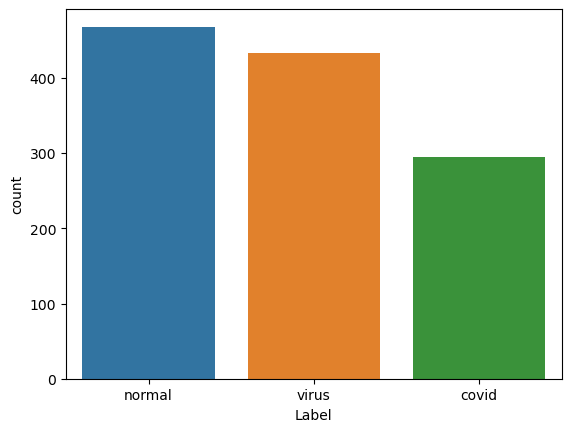

In [8]:
sns.countplot(x='Label', data=df_train)
plt.show()

In [9]:
normal_path = '/kaggle/input/shai-level-2-training-2023/train/normal/'
virus_path = '/kaggle/input/shai-level-2-training-2023/train/virus/'
covid_path = '/kaggle/input/shai-level-2-training-2023/train/covid/'

def plotXRAY(url, rowsCount, colsCount):
    data = os.listdir(url)
    fig, ax = plt.subplots(rowsCount, colsCount, sharex='col', sharey='row', figsize=(15,15))
    for row in range(rowsCount):
      for col in range(colsCount):
        img = plt.imread(url + data[row])
        ax[row, col].imshow(img, cmap="gray")
    plt.show()

Normal


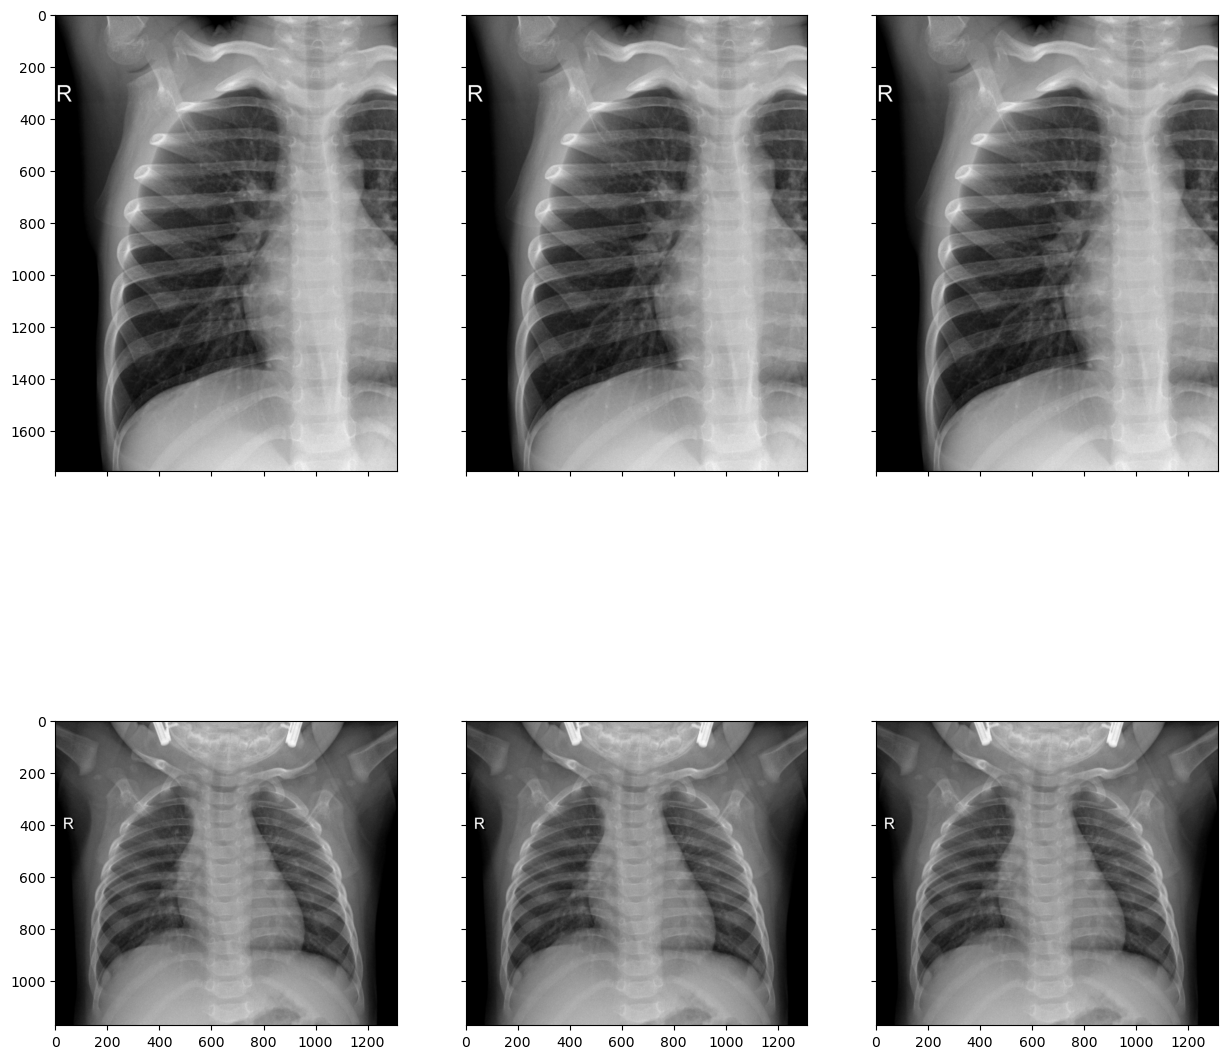

In [10]:
print("Normal")
plotXRAY(normal_path, 2, 3)

Virus


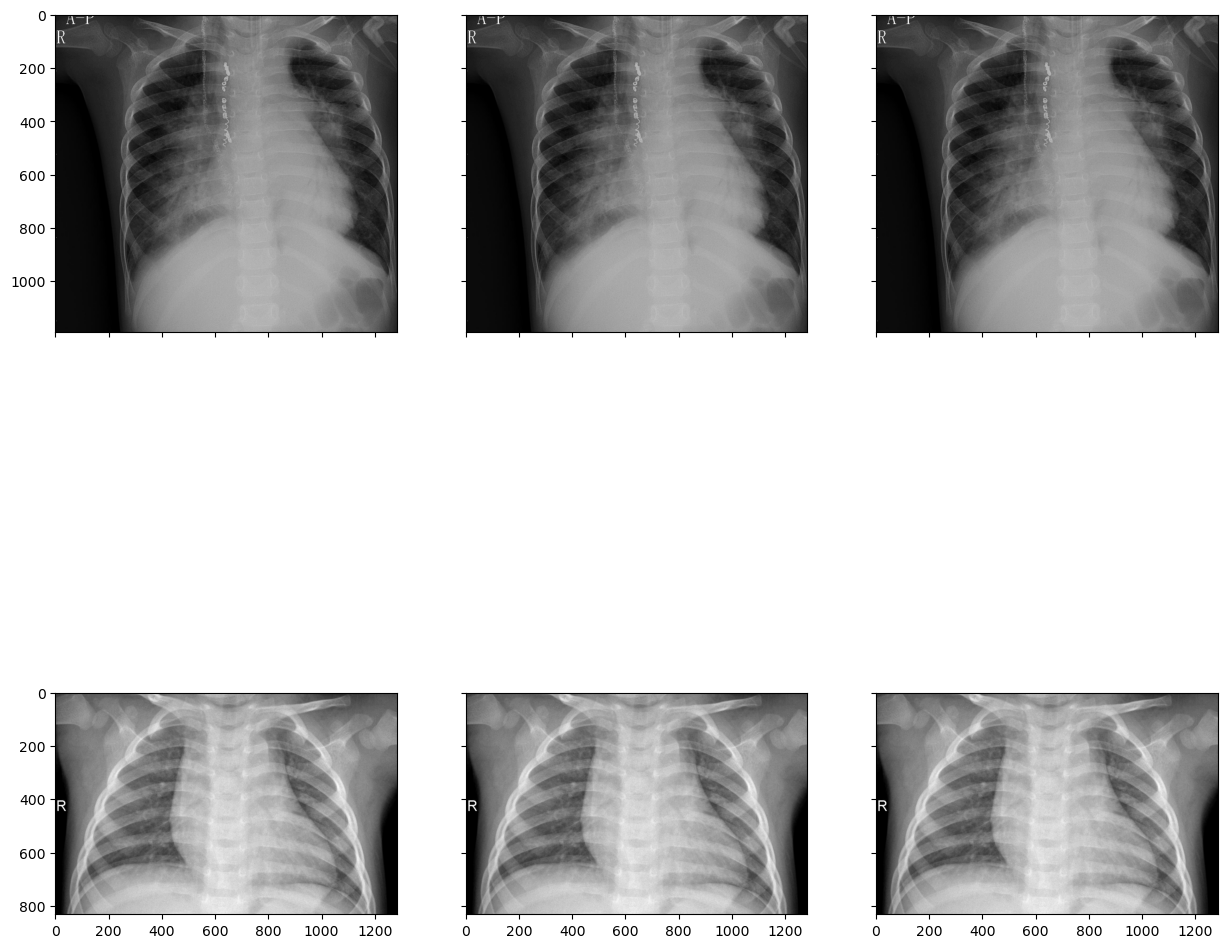

In [11]:
print("Virus")
plotXRAY(virus_path, 2, 3)

Covid


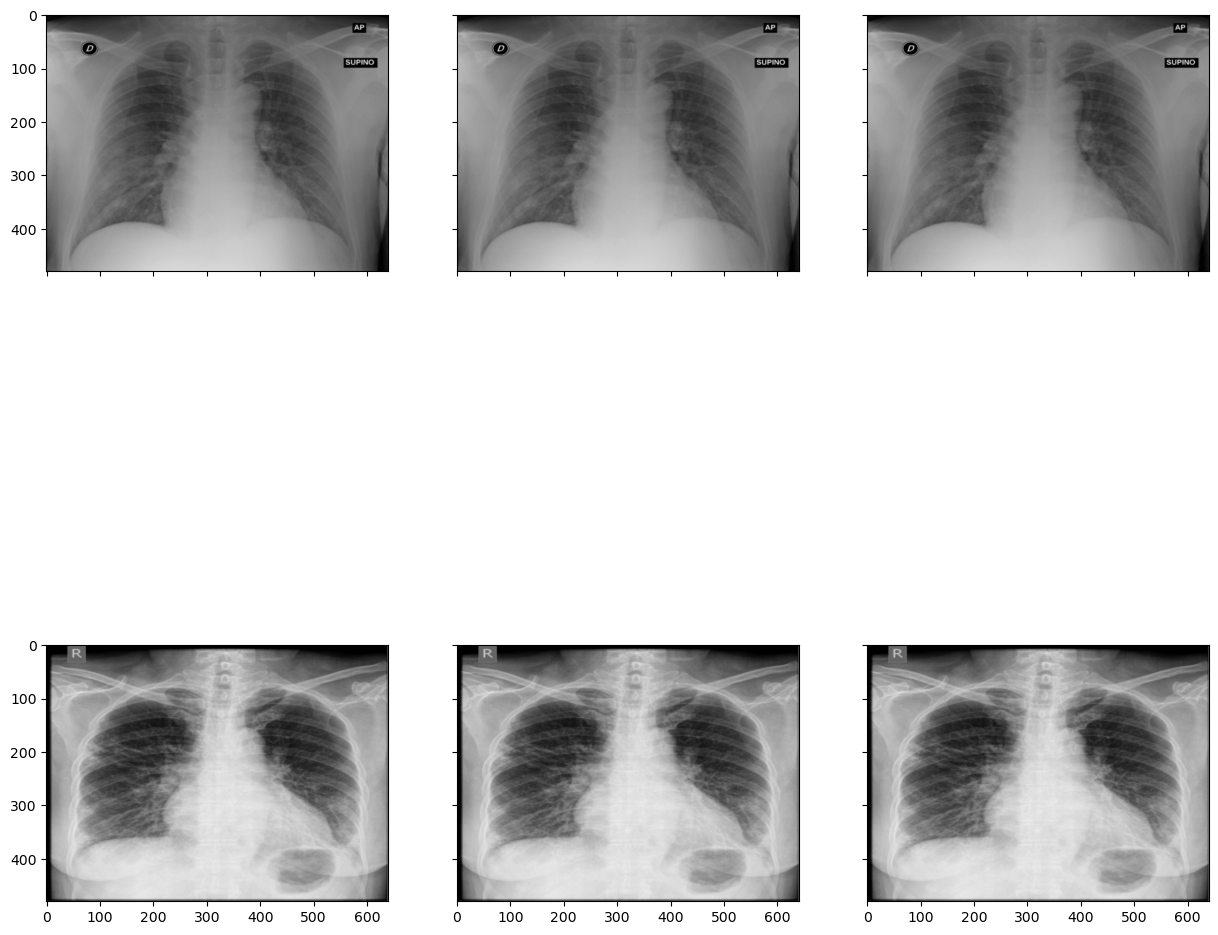

In [12]:
print("Covid")
plotXRAY(covid_path, 2, 3)

---

### Images Preprocessing

In [13]:
df_train = '/kaggle/input/shai-level-2-training-2023/train'
df_test = '/kaggle/input/shai-level-2-training-2023/test'

dataset=tf.keras.preprocessing.image_dataset_from_directory(df_train,label_mode='categorical', batch_size=32,image_size=[224,224],
                                                            shuffle=True,
                                                            seed=42)

train_size = int(.8*len(dataset))
train_df= dataset.take(train_size)
test_df = dataset.skip(train_size)

Found 1196 files belonging to 3 classes.


In [14]:
def preprocess_image(image,label):
    # image=tf.keras.applications.vgg16.preprocess_input(image)
    image=image/255.0
    return image,label


def prepare_dataset(dataset,training=False):
    dataset=dataset.map(preprocess_image,num_parallel_calls=tf.data.experimental.AUTOTUNE)
    # if training:
    #   dataset=dataset.map(image_augmentation)
    #   dataset=dataset.shuffle(1000)
    # dataset=dataset.batch(32)
    dataset.prefetch(tf.data.AUTOTUNE)
    return dataset
train_df = prepare_dataset(train_df,training=True)
test_df = prepare_dataset(test_df,training=False)



'''
train_datagen = ImageDataGenerator(rescale=1./255,
                                        validation_split=.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        rotation_range=15,
                                        fill_mode="nearest")

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'categorical',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'categorical',
                                            batch_size = 1,
                                            shuffle = False)'''

'\ntrain_datagen = ImageDataGenerator(rescale=1./255,\n                                        validation_split=.2,\n                                        shear_range=0.2,\n                                        zoom_range=0.2,\n                                        horizontal_flip=True,\n                                        rotation_range=15,\n                                        fill_mode="nearest")\n\nval_datagen = ImageDataGenerator(rescale=1/255.)\n\nds_train = train_datagen.flow_from_dataframe(train_df,\n                                             #directory=train_path, #dataframe contains the full paths\n                                             x_col = \'image\',\n                                             y_col = \'class\',\n                                             target_size = (IMG_SIZE, IMG_SIZE),\n                                             class_mode = \'categorical\',\n                                             batch_size = BATCH,\n               

---

### Model Building

In [15]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 

In [16]:
model_cnn = tf.keras.models.Sequential(
    [

        tf.keras.layers.Conv2D(
            128,
            3,
            padding="same",
            activation="relu",
            kernel_initializer="he_normal",
            input_shape=(224, 224, 3),
        ),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
     
        tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.1),
     
        tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.3),
      
         tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
         tf.keras.layers.Dropout(0.4),
     
        # tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
        # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        # tf.keras.layers.Dropout(0.3),
     
        tf.keras.layers.Flatten(),
   
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation="softmax"),
    ]
)


In [17]:
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.001,beta_1=.9,beta_2=.999),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.metrics.CategoricalAccuracy()]
)
history = model_cnn.fit(train_df,
                        batch_size = BATCH,
                        validation_data = test_df,
                        epochs=100,
                        callbacks=[early_stopping, plateau])

Epoch 1/100


2023-04-13 22:13:01.097946: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 29s 650ms/step - loss: 1.0142 - categorical_accuracy: 0.4823 - val_loss: 0.8128 - val_categorical_accuracy: 0.7331 - lr: 0.0010
Epoch 2/100
30/30 [==============================] - 21s 611ms/step - loss: 0.5703 - categorical_accuracy: 0.7490 - val_loss: 0.4819 - val_categorical_accuracy: 0.8305 - lr: 0.0010
Epoch 3/100
30/30 [==============================] - 22s 674ms/step - loss: 0.3942 - categorical_accuracy: 0.8583 - val_loss: 0.3962 - val_categorical_accuracy: 0.8898 - lr: 0.0010
Epoch 4/100
30/30 [==============================] - 21s 629ms/step - loss: 0.3094 - categorical_accuracy: 0.8823 - val_loss: 0.3142 - val_categorical_accuracy: 0.8856 - lr: 0.0010
Epoch 5/100
30/30 [==============================] - 21s 646ms/step - loss: 0.2951 - categorical_accuracy: 0.9000 - val_loss: 0.2413 - val_categorical_accuracy: 0.9364 - lr: 0.0010
Epoch 6/100
30/30 [==============================] - 21s 637ms/step - loss: 0.2355 - categorical_accuracy: 

In [18]:
model_cnn.save('Base_Model.h5')
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        3

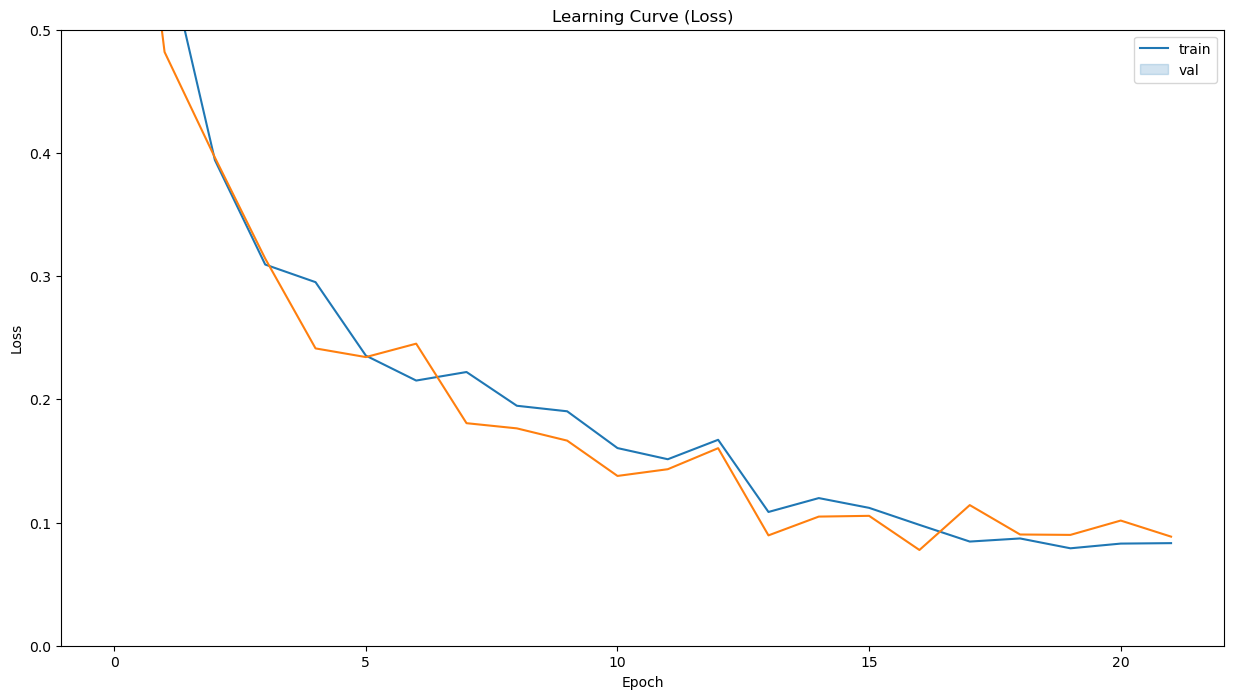

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

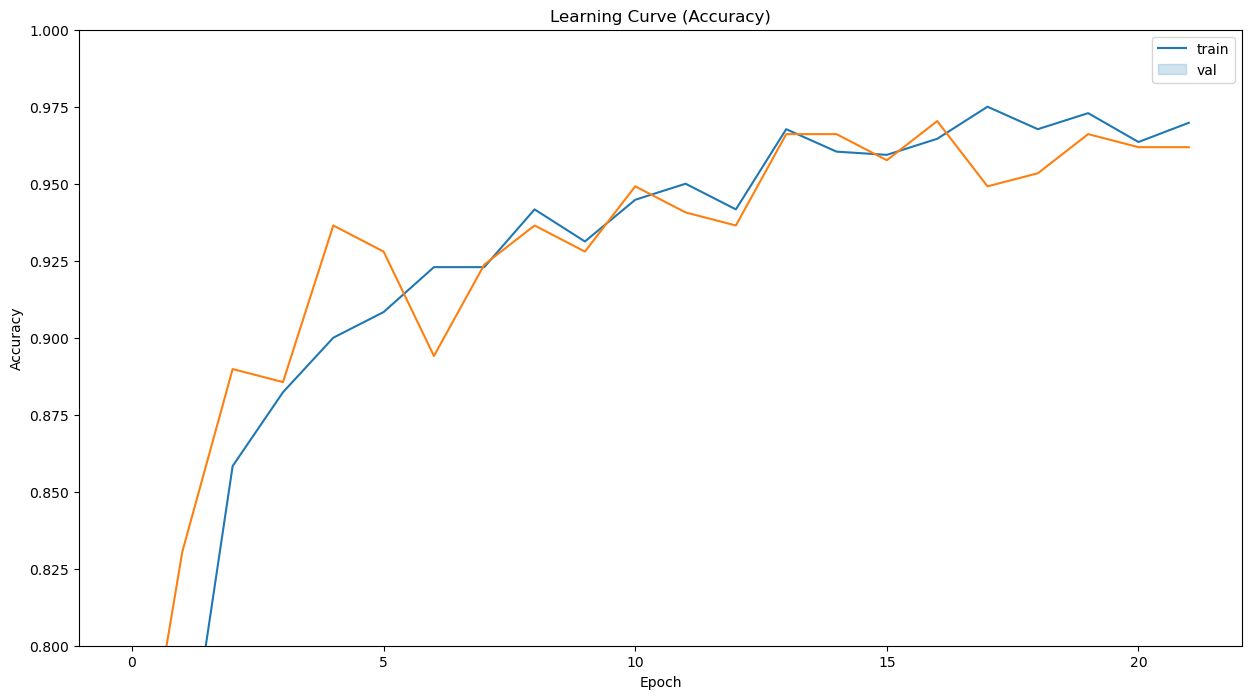

In [20]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = history.epoch, y = history.history['categorical_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_categorical_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [21]:
score = model_cnn.evaluate(test_df, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Val loss: 0.11262628436088562
Val accuracy: 0.9533898234367371


---

## Evaluation and Transfer Learning

### Inception

In [23]:
Incept_model = InceptionV3(input_shape = (IMG_SIZE, IMG_SIZE, 3),
                         include_top = False,
                         weights = 'imagenet')
for layer in Incept_model.layers:
    layer.trainable = False

x = layers.Flatten()(Incept_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final softmax layer with 3 node for classification output
x = layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(Incept_model.input, x)

model.compile(optimizer = keras.optimizers.Adam(learning_rate=.0001), loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])
inc_history = model.fit(train_df,
                        batch_size = BATCH,
                        epochs = 50,
                        validation_data=test_df,
                        callbacks=[early_stopping, plateau])

Epoch 1/50
30/30 [==============================] - 38s 1s/step - loss: 1.4940 - categorical_accuracy: 0.7937 - val_loss: 0.3553 - val_categorical_accuracy: 0.9068 - lr: 1.0000e-04
Epoch 2/50
30/30 [==============================] - 19s 590ms/step - loss: 0.2007 - categorical_accuracy: 0.9292 - val_loss: 0.1469 - val_categorical_accuracy: 0.9619 - lr: 1.0000e-04
Epoch 3/50
30/30 [==============================] - 20s 607ms/step - loss: 0.1819 - categorical_accuracy: 0.9354 - val_loss: 0.1872 - val_categorical_accuracy: 0.9449 - lr: 1.0000e-04
Epoch 4/50
30/30 [==============================] - ETA: 0s - loss: 0.1173 - categorical_accuracy: 0.9594
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
30/30 [==============================] - 20s 604ms/step - loss: 0.1173 - categorical_accuracy: 0.9594 - val_loss: 0.1598 - val_categorical_accuracy: 0.9576 - lr: 1.0000e-04
Epoch 5/50
30/30 [==============================] - 19s 586ms/step - loss: 0.0680 - categorical

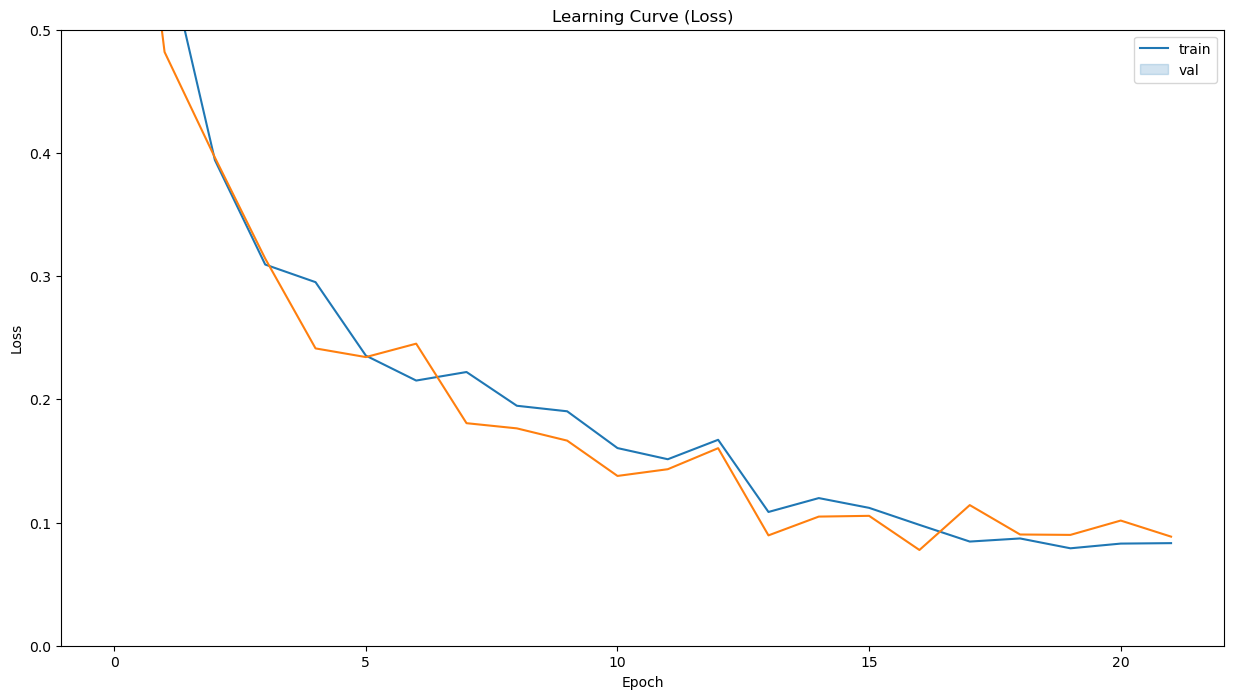

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

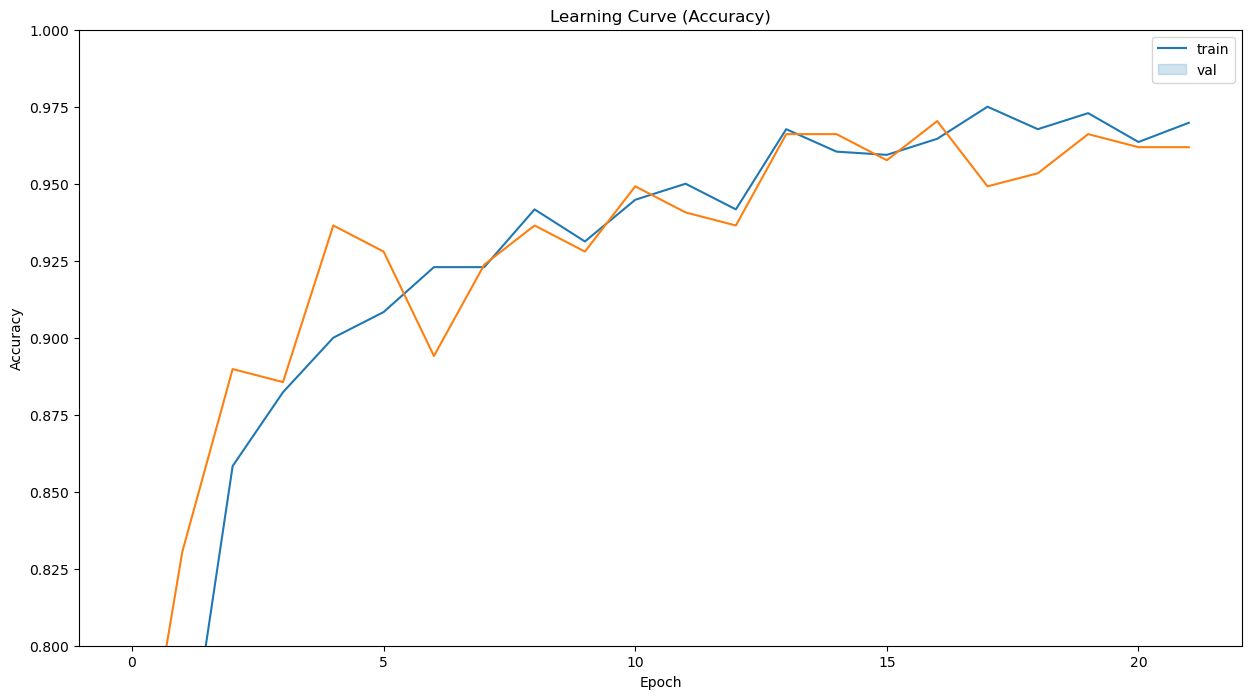

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = history.epoch, y = history.history['categorical_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_categorical_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [26]:
score = model.evaluate(test_df, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0991886779665947
Test accuracy: 0.9618644118309021


In [27]:
model.save('Inception_Model.h5')

---
### ResNet

In [29]:
res_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

def get_pretrained():
    
    for layer in res_model.layers:
        layer.trainable = False
        
    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE,IMG_SIZE,3))
    
    x = res_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(3, activation='softmax')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

keras.backend.clear_session()
res_model = get_pretrained()
res_model.compile(loss='categorical_crossentropy',
                  optimizer = keras.optimizers.Adam(learning_rate=.001),
                  metrics='categorical_accuracy')

res_history = res_model.fit(train_df,
                        batch_size = BATCH,
                        epochs = 50,
                        validation_data=test_df,
                        callbacks=[early_stopping, plateau])

Epoch 1/50
30/30 [==============================] - 43s 1s/step - loss: 0.4783 - categorical_accuracy: 0.8208 - val_loss: 0.2367 - val_categorical_accuracy: 0.8983 - lr: 0.0010
Epoch 2/50
30/30 [==============================] - 22s 672ms/step - loss: 0.2069 - categorical_accuracy: 0.9312 - val_loss: 0.1710 - val_categorical_accuracy: 0.9407 - lr: 0.0010
Epoch 3/50
30/30 [==============================] - 22s 665ms/step - loss: 0.1549 - categorical_accuracy: 0.9396 - val_loss: 0.1268 - val_categorical_accuracy: 0.9576 - lr: 0.0010
Epoch 4/50
30/30 [==============================] - 21s 656ms/step - loss: 0.1243 - categorical_accuracy: 0.9604 - val_loss: 0.1281 - val_categorical_accuracy: 0.9576 - lr: 0.0010
Epoch 5/50
30/30 [==============================] - 22s 670ms/step - loss: 0.0918 - categorical_accuracy: 0.9708 - val_loss: 0.0815 - val_categorical_accuracy: 0.9788 - lr: 0.0010
Epoch 6/50
30/30 [==============================] - 21s 643ms/step - loss: 0.0799 - categorical_accurac

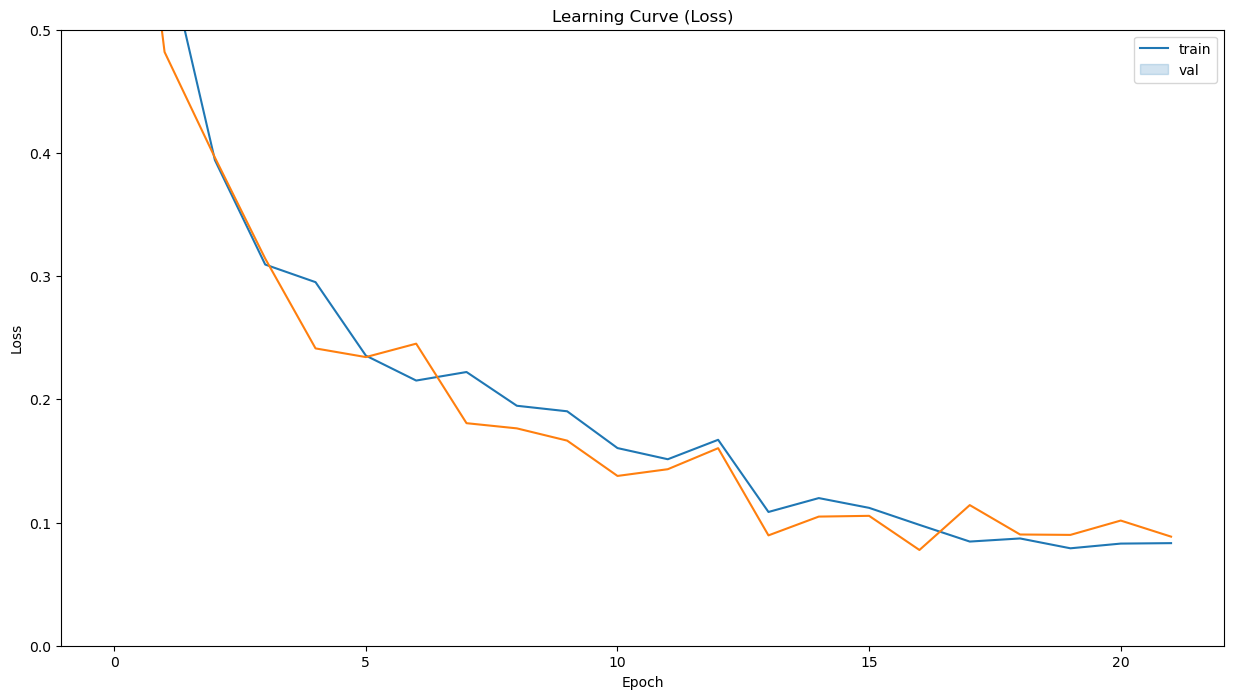

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

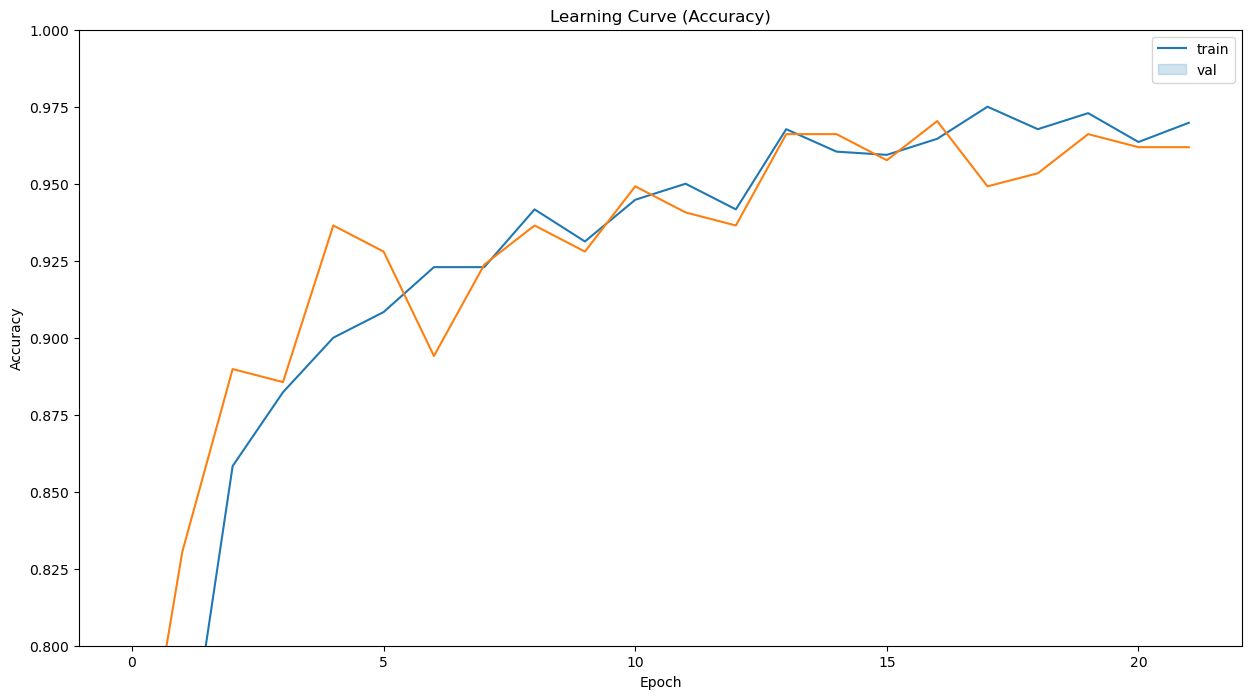

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = history.epoch, y = history.history['categorical_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_categorical_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [32]:
score = res_model.evaluate(test_df, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08901192247867584
Test accuracy: 0.9745762944221497


In [33]:
res_model.save('ResNet_Model.h5')

---
### VGG16 Model

In [42]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    """
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(3, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy'])
    
    return model

input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.001)
n_classes=3
BATCH_SIZE = 32
n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [43]:
vgg_history = vgg_model.fit(train_df,
                            batch_size=BATCH_SIZE,
                            epochs=n_epochs,
                            validation_data=test_df,
                            callbacks=[early_stopping, plateau],
                            verbose=1)

Epoch 1/50
30/30 [==============================] - 23s 628ms/step - loss: 4.0562 - categorical_accuracy: 0.7042 - val_loss: 0.2520 - val_categorical_accuracy: 0.9110 - lr: 0.0010
Epoch 2/50
30/30 [==============================] - 20s 629ms/step - loss: 0.1915 - categorical_accuracy: 0.9333 - val_loss: 0.1387 - val_categorical_accuracy: 0.9449 - lr: 0.0010
Epoch 3/50
30/30 [==============================] - 20s 613ms/step - loss: 0.0929 - categorical_accuracy: 0.9719 - val_loss: 0.0671 - val_categorical_accuracy: 0.9746 - lr: 0.0010
Epoch 4/50
30/30 [==============================] - 20s 605ms/step - loss: 0.1071 - categorical_accuracy: 0.9615 - val_loss: 0.2040 - val_categorical_accuracy: 0.9534 - lr: 0.0010
Epoch 5/50
30/30 [==============================] - 20s 628ms/step - loss: 0.0796 - categorical_accuracy: 0.9740 - val_loss: 0.0303 - val_categorical_accuracy: 0.9873 - lr: 0.0010
Epoch 6/50
30/30 [==============================] - 20s 609ms/step - loss: 0.0397 - categorical_accu

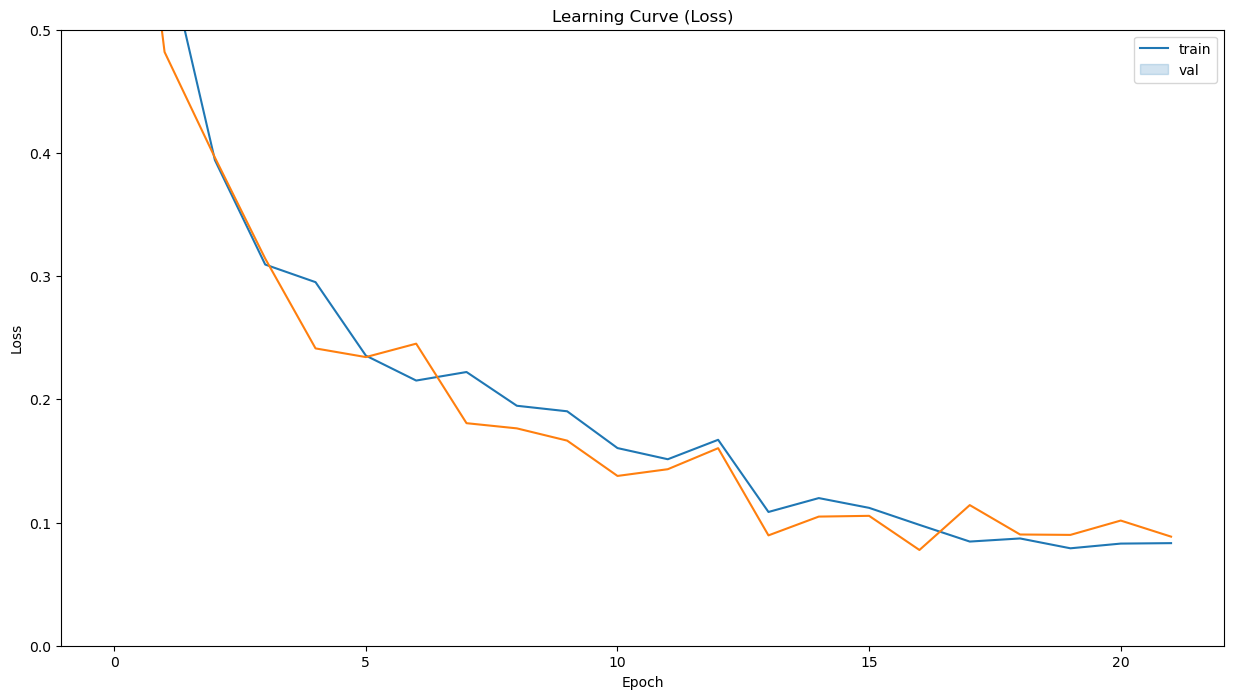

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

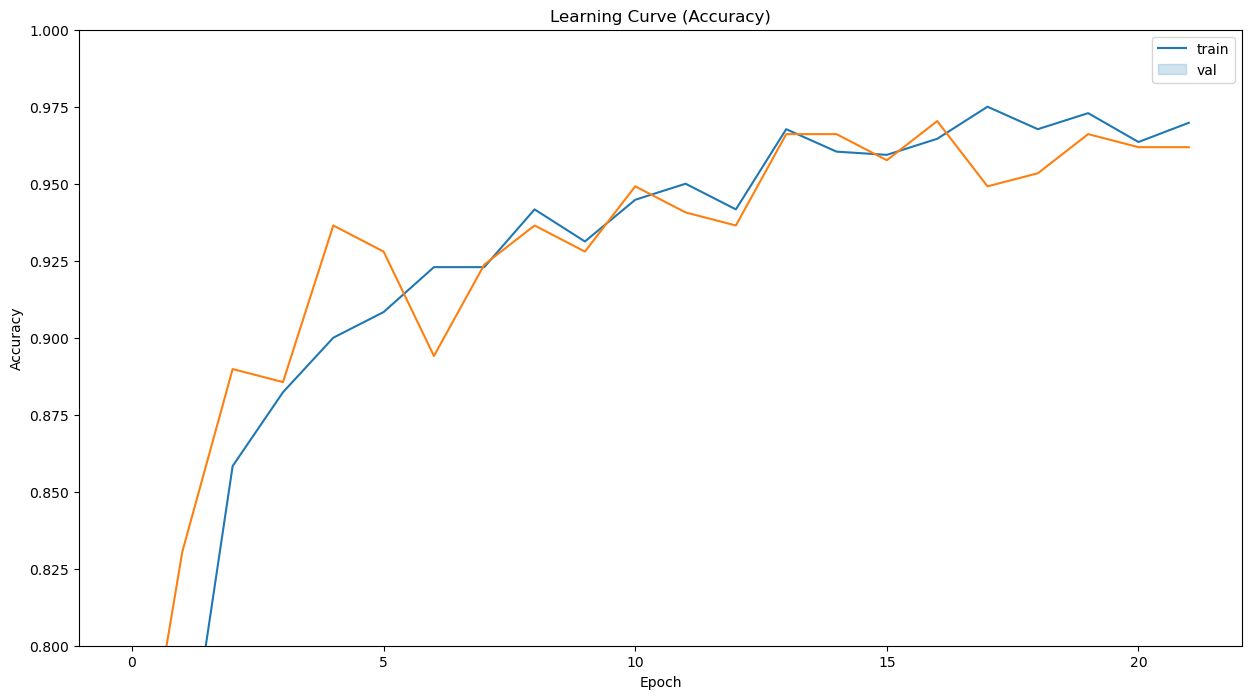

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
sns.lineplot(x = history.epoch, y = history.history['categorical_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_categorical_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [46]:
score = vgg_model.evaluate(test_df, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02272886224091053
Test accuracy: 0.9957627058029175


In [47]:
vgg_model.save('VGG_Model.h5')

---
### Submission and Prediction

In [49]:
class_names = ['covid', 'normal', 'virus']
images_dir = "/kaggle/input/shai-level-2-training-2023/test"

VGG_predictions = []
RESNET_predictions = []
INCEPTION_predictions = []

# VGG model Predictions
for image_file in os.listdir(images_dir):
    image_path = os.path.join(images_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    
    VGG_prediction = vgg_model.predict(np.expand_dims(image, axis = 0))
    predicted_class = class_names[np.argmax(VGG_prediction)]
    
    VGG_predictions.append((image_file, predicted_class))
    

# ResNet model Predictions
for image_file in os.listdir(images_dir):
    image_path = os.path.join(images_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    
    RESNET_prediction = res_model.predict(np.expand_dims(image, axis = 0))
    predicted_class = class_names[np.argmax(RESNET_prediction)]
    
    RESNET_predictions.append((image_file, predicted_class))
    
# Inception model Predictions
for image_file in os.listdir(images_dir):
    image_path = os.path.join(images_dir, image_file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224,224))
    
    INCEPTION_prediction = model.predict(np.expand_dims(image, axis = 0))
    predicted_class = class_names[np.argmax(INCEPTION_prediction)]
    
    INCEPTION_predictions.append((image_file, predicted_class))

1/1 [==============================] - 0s 32ms/step


In [50]:
with open("VGG_Submission.csv", 'w', newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Image", "Label"])
    for prediction in VGG_predictions:
        writer.writerow(prediction)

In [51]:
with open("RESNET_Submission.csv", 'w', newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Image", "Label"])
    for prediction in RESNET_predictions:
        writer.writerow(prediction)

In [52]:
with open("INCEPTION_Submission.csv", 'w', newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Image", "Label"])
    for prediction in INCEPTION_predictions:
        writer.writerow(prediction)

In [53]:
pred = pd.read_csv("VGG_Submission.csv")
pred.head()

,Image,Label
0,237487502.jpeg,normal
1,578242651.jpeg,normal
2,111993936.jpeg,virus
3,491589162.jpeg,virus
4,545163486.jpeg,virus


In [54]:
pred = pd.read_csv("RESNET_Submission.csv")
pred.head()

,Image,Label
0,237487502.jpeg,covid
1,578242651.jpeg,covid
2,111993936.jpeg,covid
3,491589162.jpeg,covid
4,545163486.jpeg,covid


In [55]:
pred = pd.read_csv("INCEPTION_Submission.csv")
pred.head()

,Image,Label
0,237487502.jpeg,covid
1,578242651.jpeg,covid
2,111993936.jpeg,covid
3,491589162.jpeg,covid
4,545163486.jpeg,covid


In [56]:
pred.Label.value_counts()

covid    513
Name: Label, dtype: int64